In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import time

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [24]:
# After performing latent space interpolation
import mygene
regions = ["BLA", "VTA", "CPU", "HIP", "PFC", "NAC"]

index_arrs = []
# DATA_PATH = "../data/0917/"
DATA_PATH = "../../data/0921/"

for i, region in enumerate(regions):

    df = pd.read_csv(DATA_PATH + "0825_%s_sample_averaged_profile.csv" % region, index_col = 0)
    index_arrs.append(df.index)

intersected_index = index_arrs[0] & index_arrs[1] & index_arrs[2] & index_arrs[3] & index_arrs[4] & index_arrs[5]
union_index = index_arrs[0] | index_arrs[1] | index_arrs[2] | index_arrs[3] | index_arrs[4] | index_arrs[5]

mg = mygene.MyGeneInfo()
ens = union_index # or intersected_index 
ginfo = mg.querymany(ens, scopes='ensembl.gene')
ensembl_to_symbol_info_hash = {}
# miss_table = pd.read_csv("missing_genes_from_may_2015.CSV")
# total = pd.read_csv("gene_table_from_ucsf_BMS270_ens79.csv", index_col = 0)

for g in ginfo:
    if g["query"] not in ensembl_to_symbol_info_hash.keys() and "symbol" in g.keys():
        if "name" in g.keys():
            ensembl_to_symbol_info_hash[g["query"]] = g["symbol"] + ": " + g["name"]
        else:
            ensembl_to_symbol_info_hash[g["query"]] = g["symbol"]            
    else:
        ensembl_to_symbol_info_hash[g["query"]] = g["query"] + ":" + "missing"
#         print(miss_table[miss_table["Ensembl Gene ID"] == g["query"]]["Associated Gene Name"])
#         print(g["query"])
        
symbol_to_ensemble_hash = {}

for ens in ensembl_to_symbol_info_hash.keys():
    symbol_to_ensemble_hash[ensembl_to_symbol_info_hash[ens].split(":")[0]] = ens
#     symbol_to_ensemble_hash[total.loc[ens]["name"]] = ens
#     if ensembl_to_symbol_info_hash[ens].split(":")[0] != total.loc[ens]["name"]:
#         symbol_to_ensemble_hash[ensembl_to_symbol_info_hash[ens].split(":")[0]] = ens
#         print("%s vs %s" % (ensembl_to_symbol_info_hash[ens].split(":")[0], total.loc[ens]["name"]))

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/4292948057.py:13: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  intersected_index = index_arrs[0] & index_arrs[1] & index_arrs[2] & index_arrs[3] & index_arrs[4] & index_arrs[5]
C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/4292948057.py:14: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  union_index = index_arrs[0] | index_arrs[1] | index_arrs[2] | index_arrs[3] | index_arrs[4] | index_arrs[5]


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-14715...done.
Finished.
2 input query terms found dup hits:
	[('ENSMUSG00000029723', 3), ('ENSMUSG00000100417', 2)]
258 input query terms found no hit:
	['ENSMUSG00000000325', 'ENSMUSG00000003178', 'ENSMUSG00000021745', 'ENSMUSG00000024952', 'ENSMUSG000
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [15]:
def load_predict_df(epoch=1000):
#     predict_df = pd.read_csv(r'D:/Cocaine-GAN/Figures/data/WGAN_GP_%s_10k_32_100/WGAN_GP_epoch%d_500_gex.csv' %(region, epoch), header=None)
    predict_df = pd.read_csv(r'../../data/%s/WGAN_GP_epoch%d_500_gex.csv' %(region, epoch), header=None)
    return predict_df

def load_merged_df(training_data_df, predict_df):
    df_transposed = training_data_df.transpose()
    df_transposed_with_header = df_transposed
    df_transposed_with_header
    scaler = MinMaxScaler()
    scaler.fit(df_transposed)
    df_transposed = scaler.transform(df_transposed)

    df = pd.DataFrame(df_transposed)
    # df.columns = predict_df.columns
    merged_df = "NaN"
    predict_df = pd.DataFrame(predict_df)
    predict_df.columns = df.columns
    merged_df = pd.concat([df, predict_df])

    a_merged_df = merged_df
    

    agumented_predict_df = predict_df
    
    return a_merged_df, df_transposed_with_header

def load_merged_df_without_t(training_data_df, predict_df):
    df_transposed = training_data_df.transpose()
    predict_df = predict_df.transpose()
    df_transposed_with_header = df_transposed
    df_transposed_with_header
    scaler = MinMaxScaler()
    scaler.fit(df_transposed)
    df_transposed = scaler.transform(df_transposed)

    df = pd.DataFrame(df_transposed)
    # df.columns = predict_df.columns
    merged_df = "NaN"
    predict_df = pd.DataFrame(predict_df)
    predict_df.columns = df.columns
    merged_df = pd.concat([df, predict_df])

    a_merged_df = merged_df
    

    agumented_predict_df = predict_df
    
    return a_merged_df, df_transposed_with_header
    
def tsne_for_merged(a_merged_df):
    np.random.seed(1)
    n_sne = 7000
    time_start = time.time()
    tsne = TSNE(n_components=2)#, n_jobs=1)
    tsne_results = tsne.fit_transform(a_merged_df.values)
    df_tsne = a_merged_df.copy()
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]
    predicted_col_arr = []
    
    return df_tsne

# GAN training validation (Fig. S1. )
Training validation using tSNE - overlapping between generated and original


  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/3543822975.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


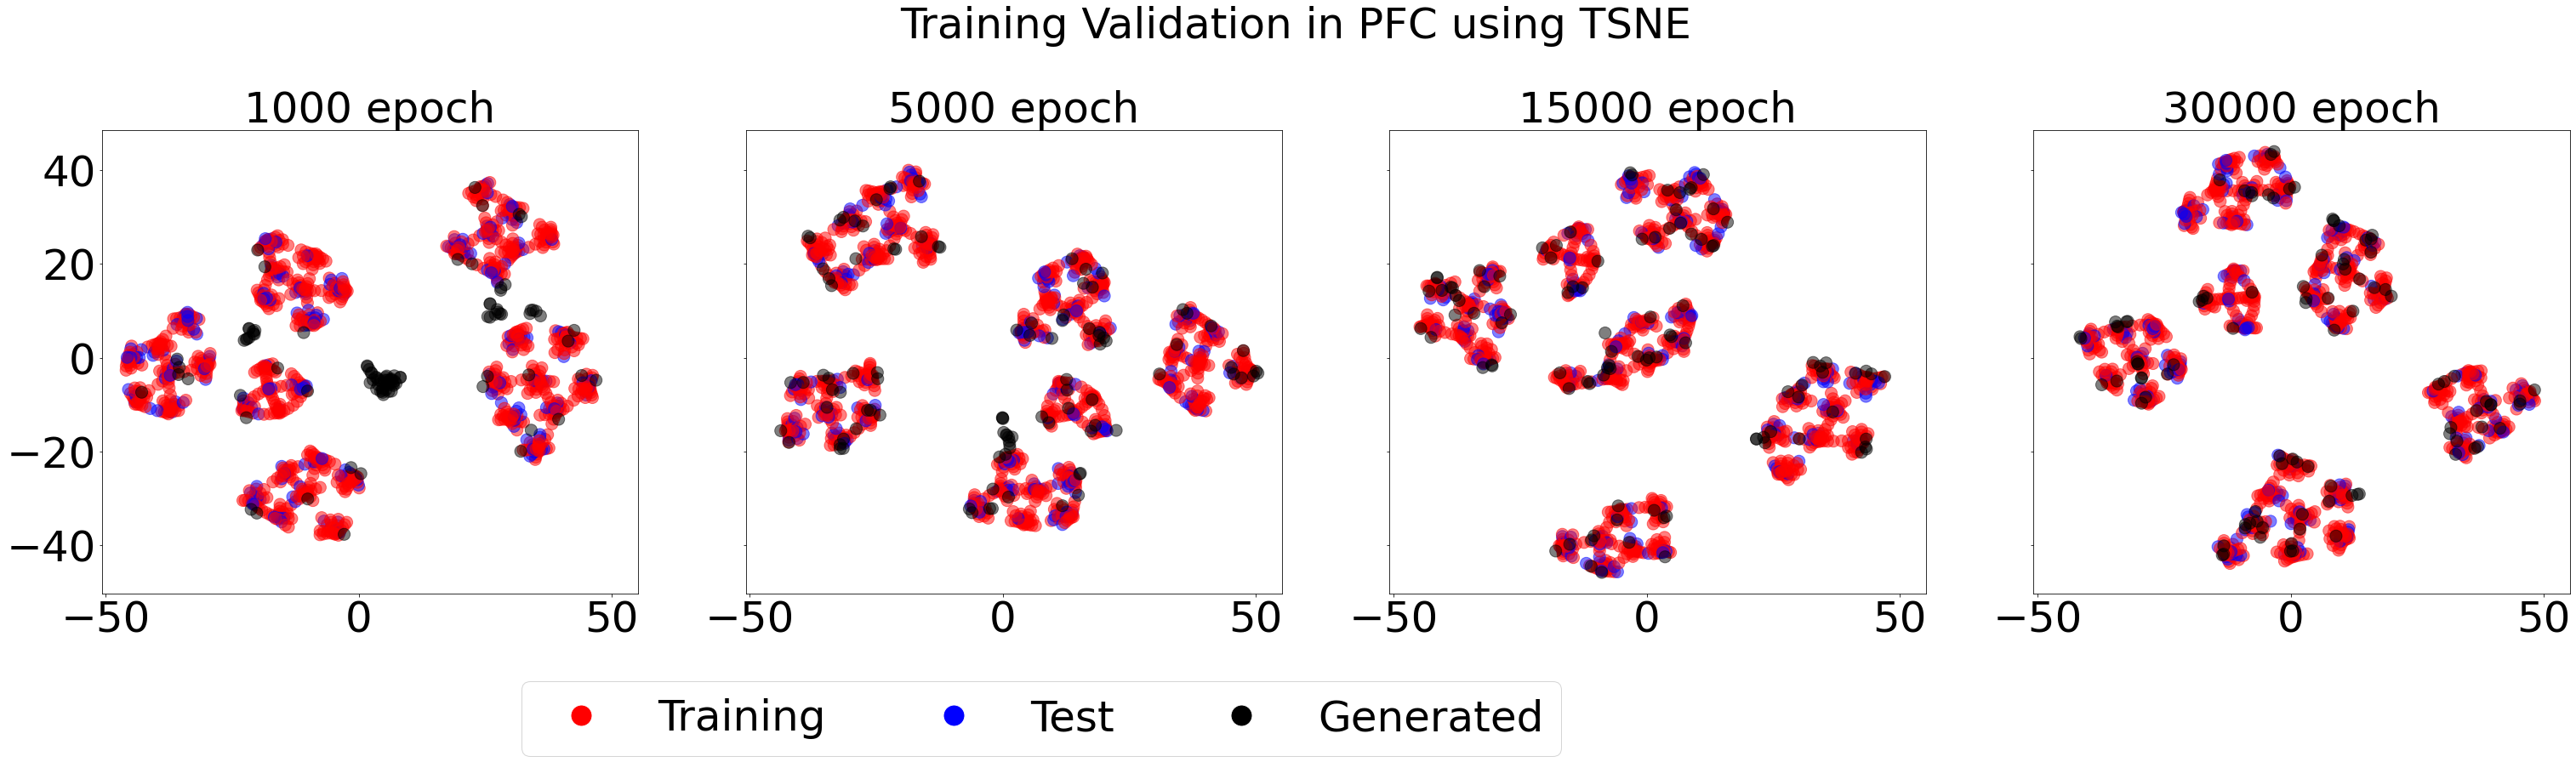

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/3543822975.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


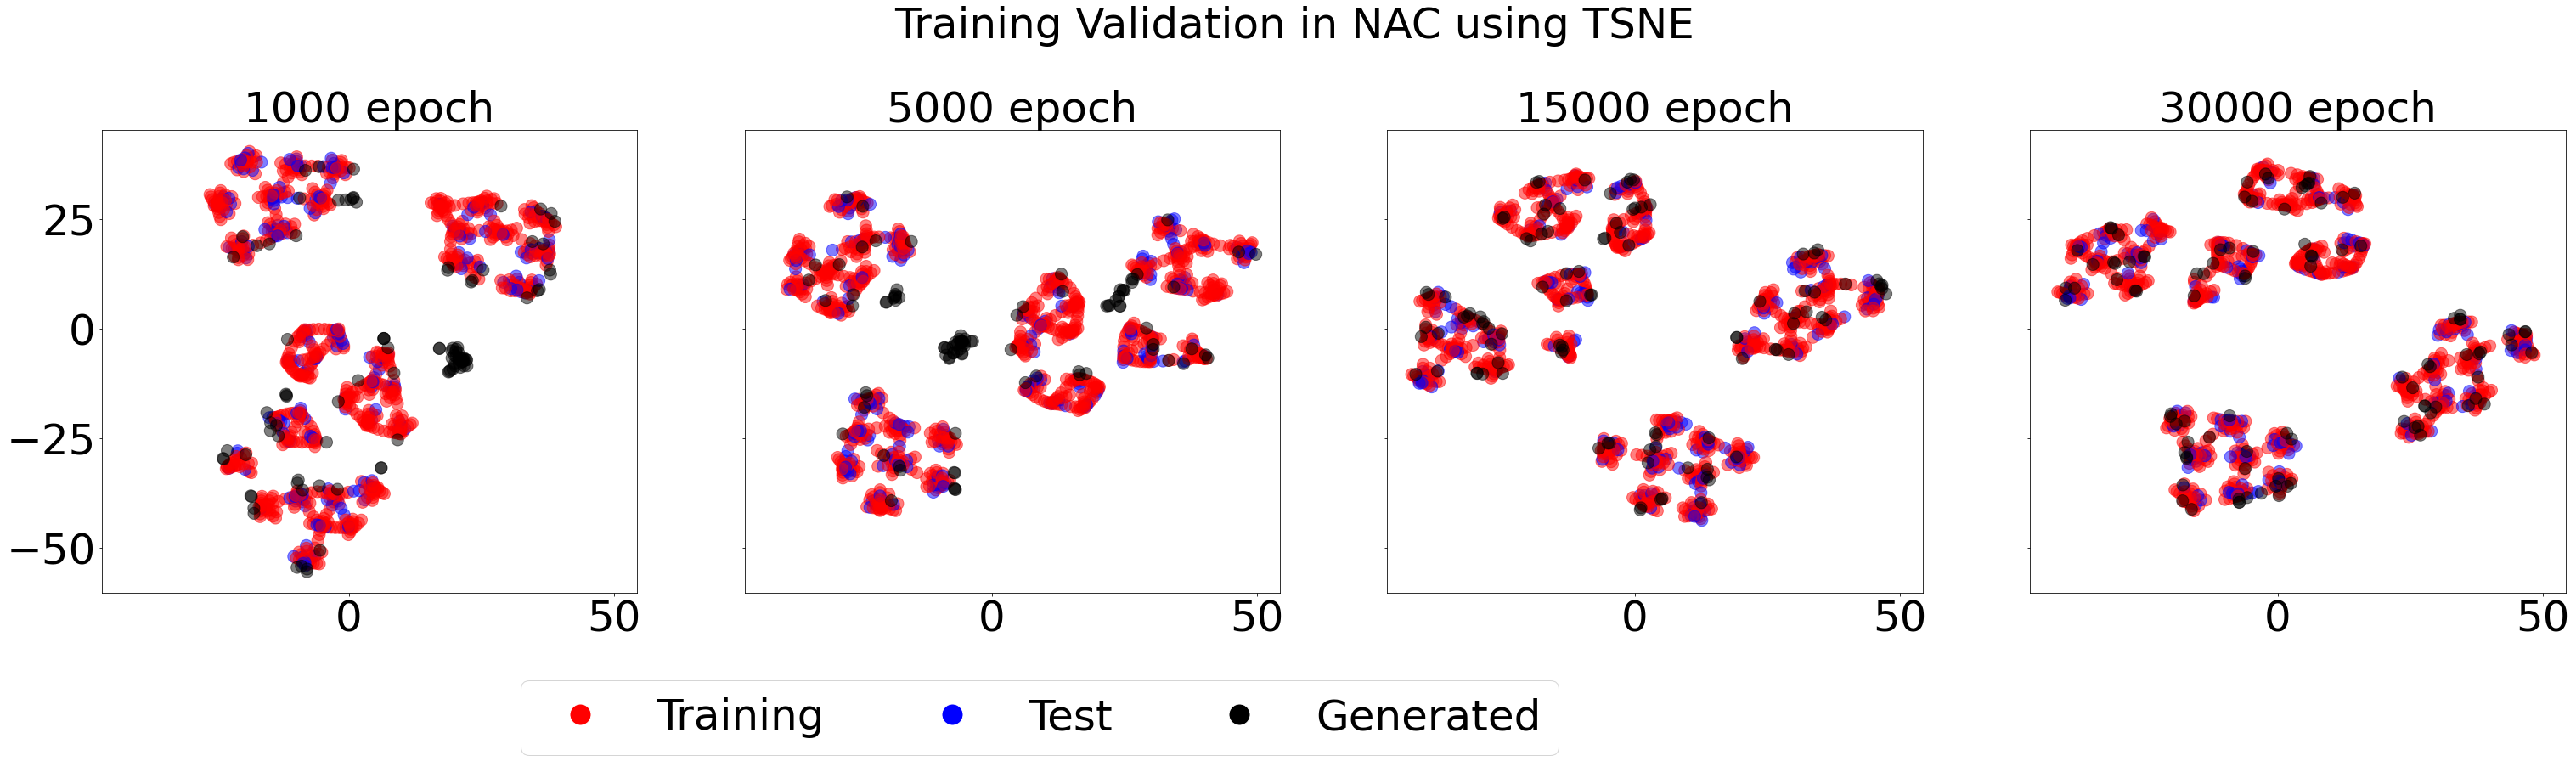

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/3543822975.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


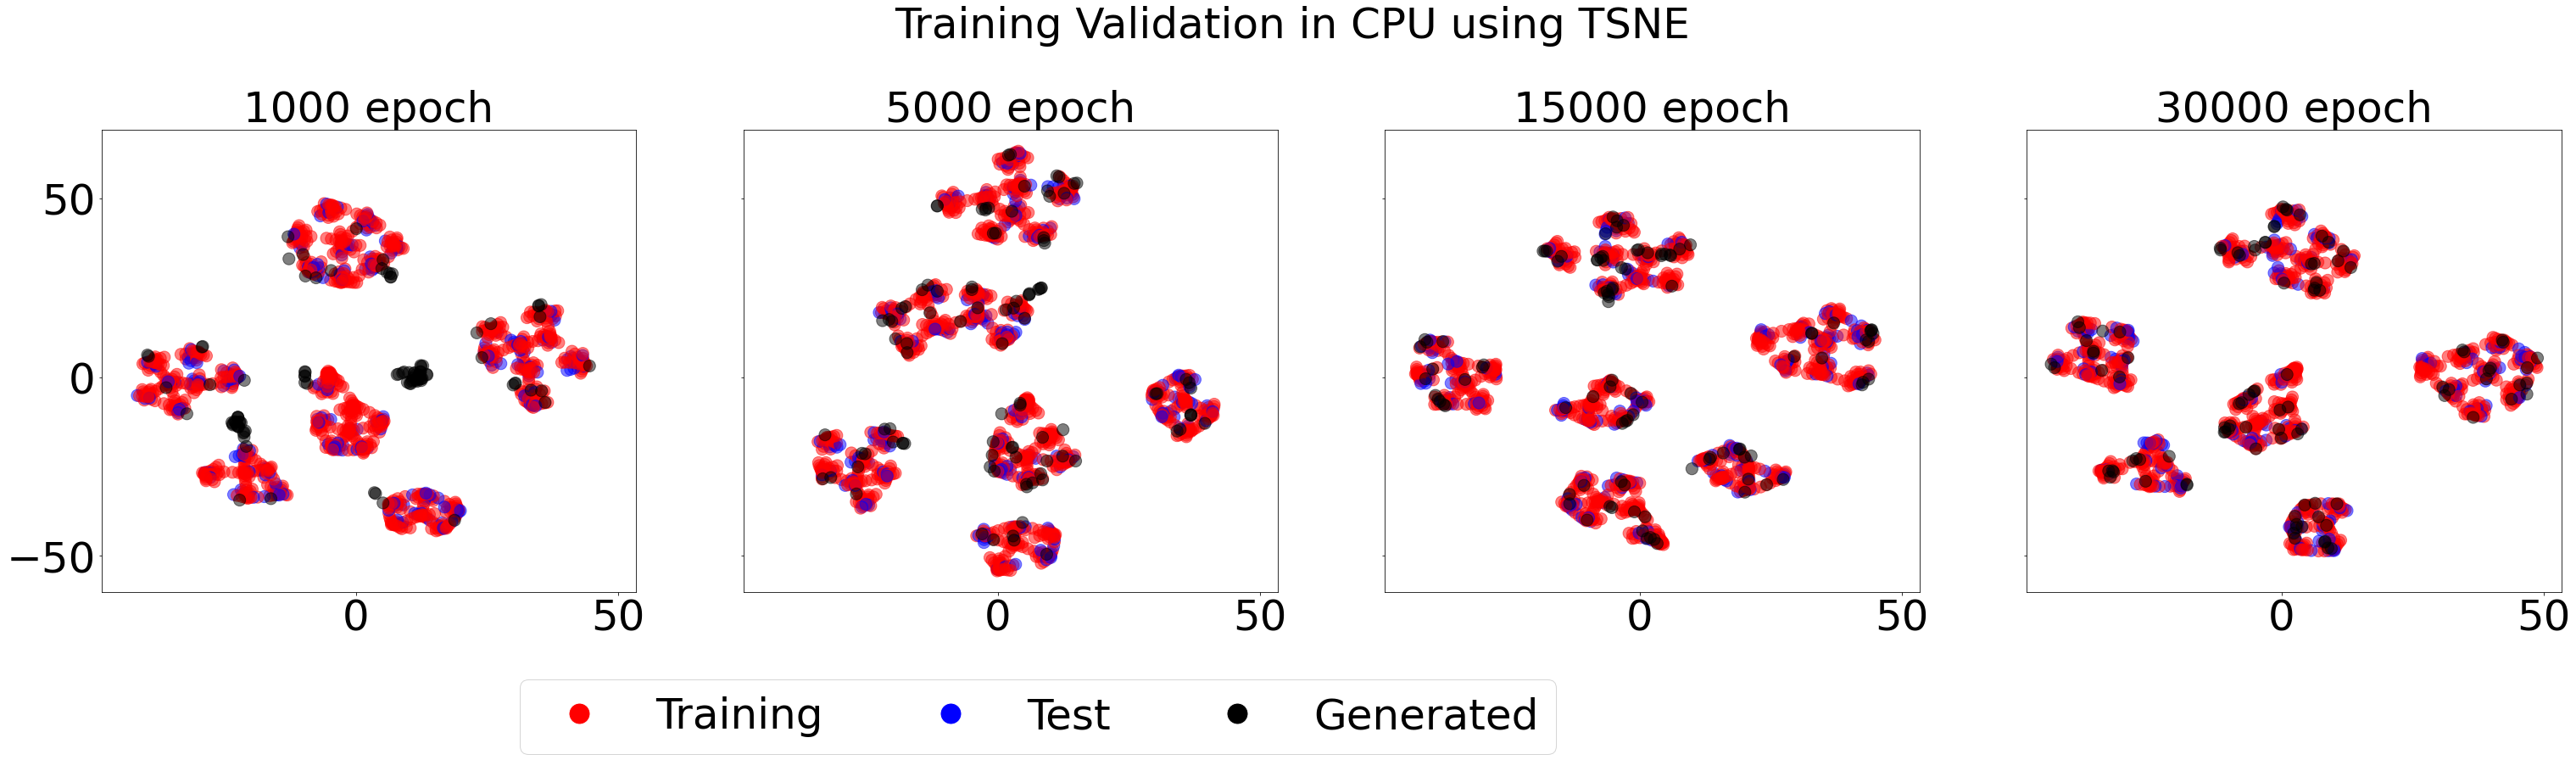

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/3543822975.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


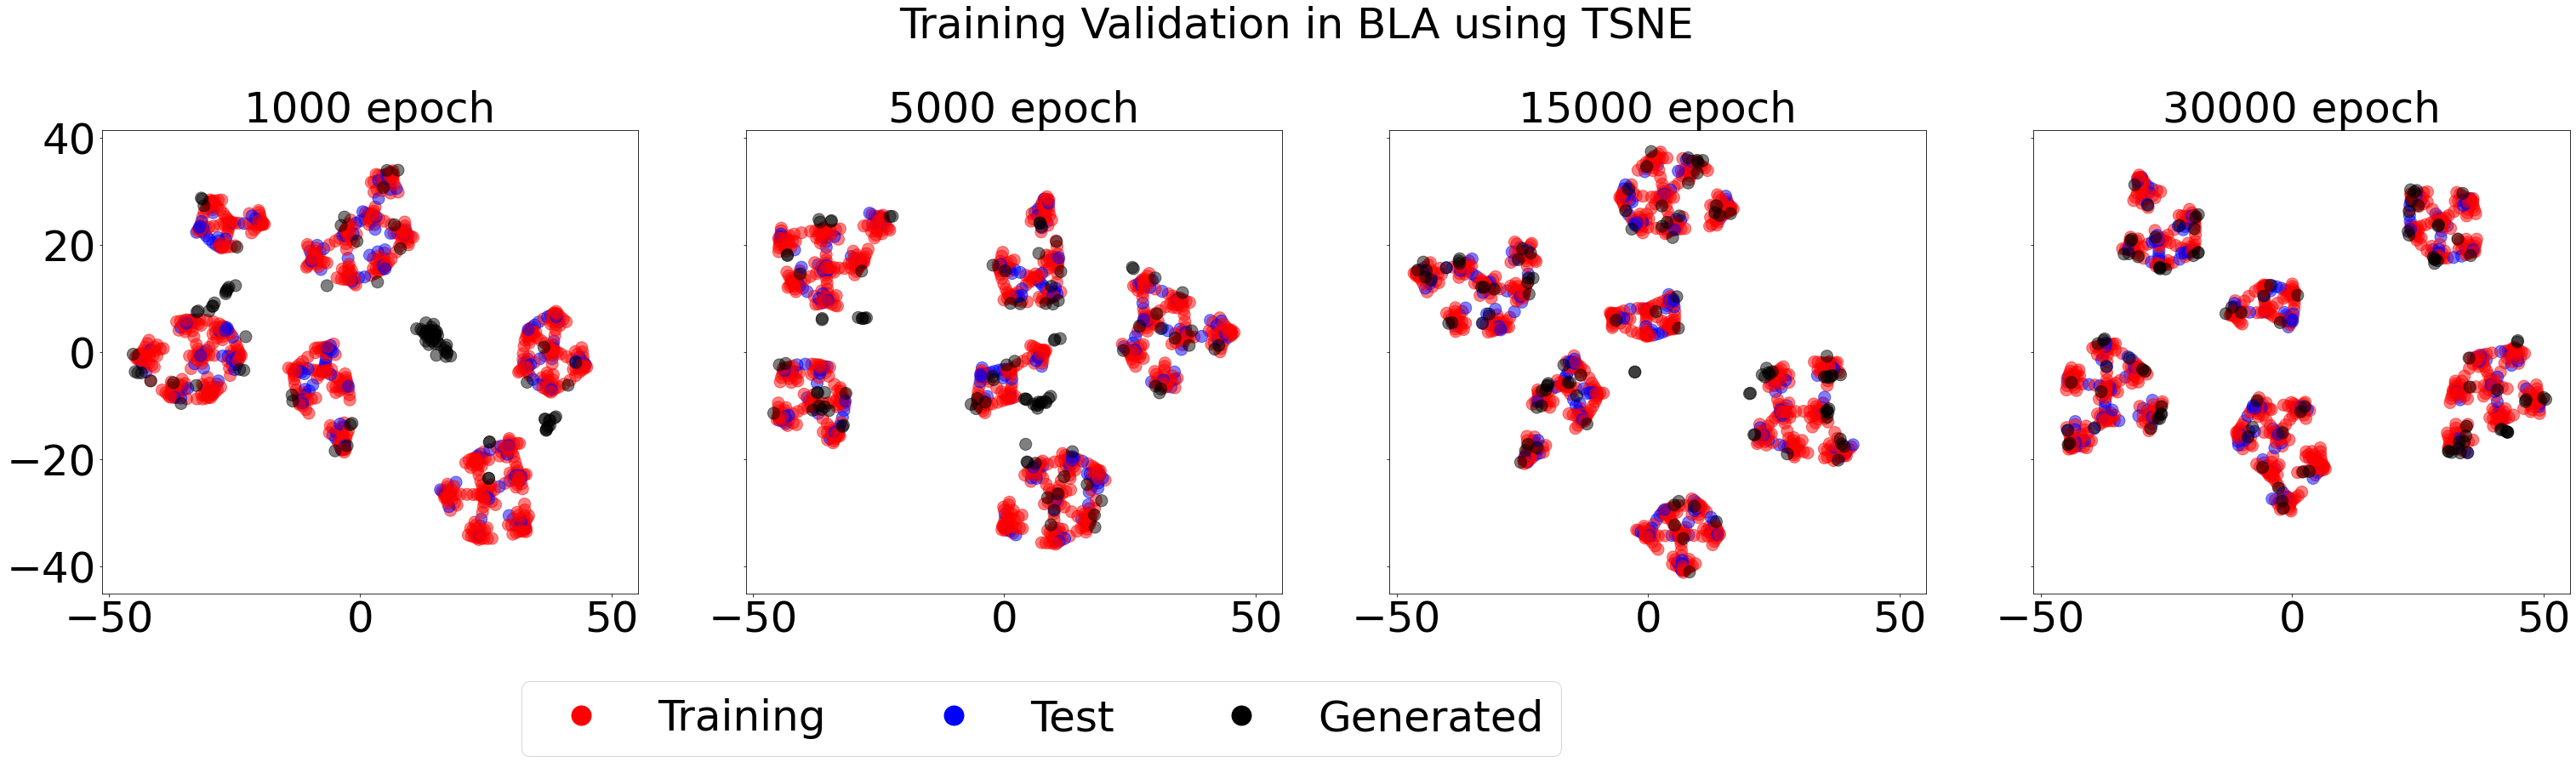

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/3543822975.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


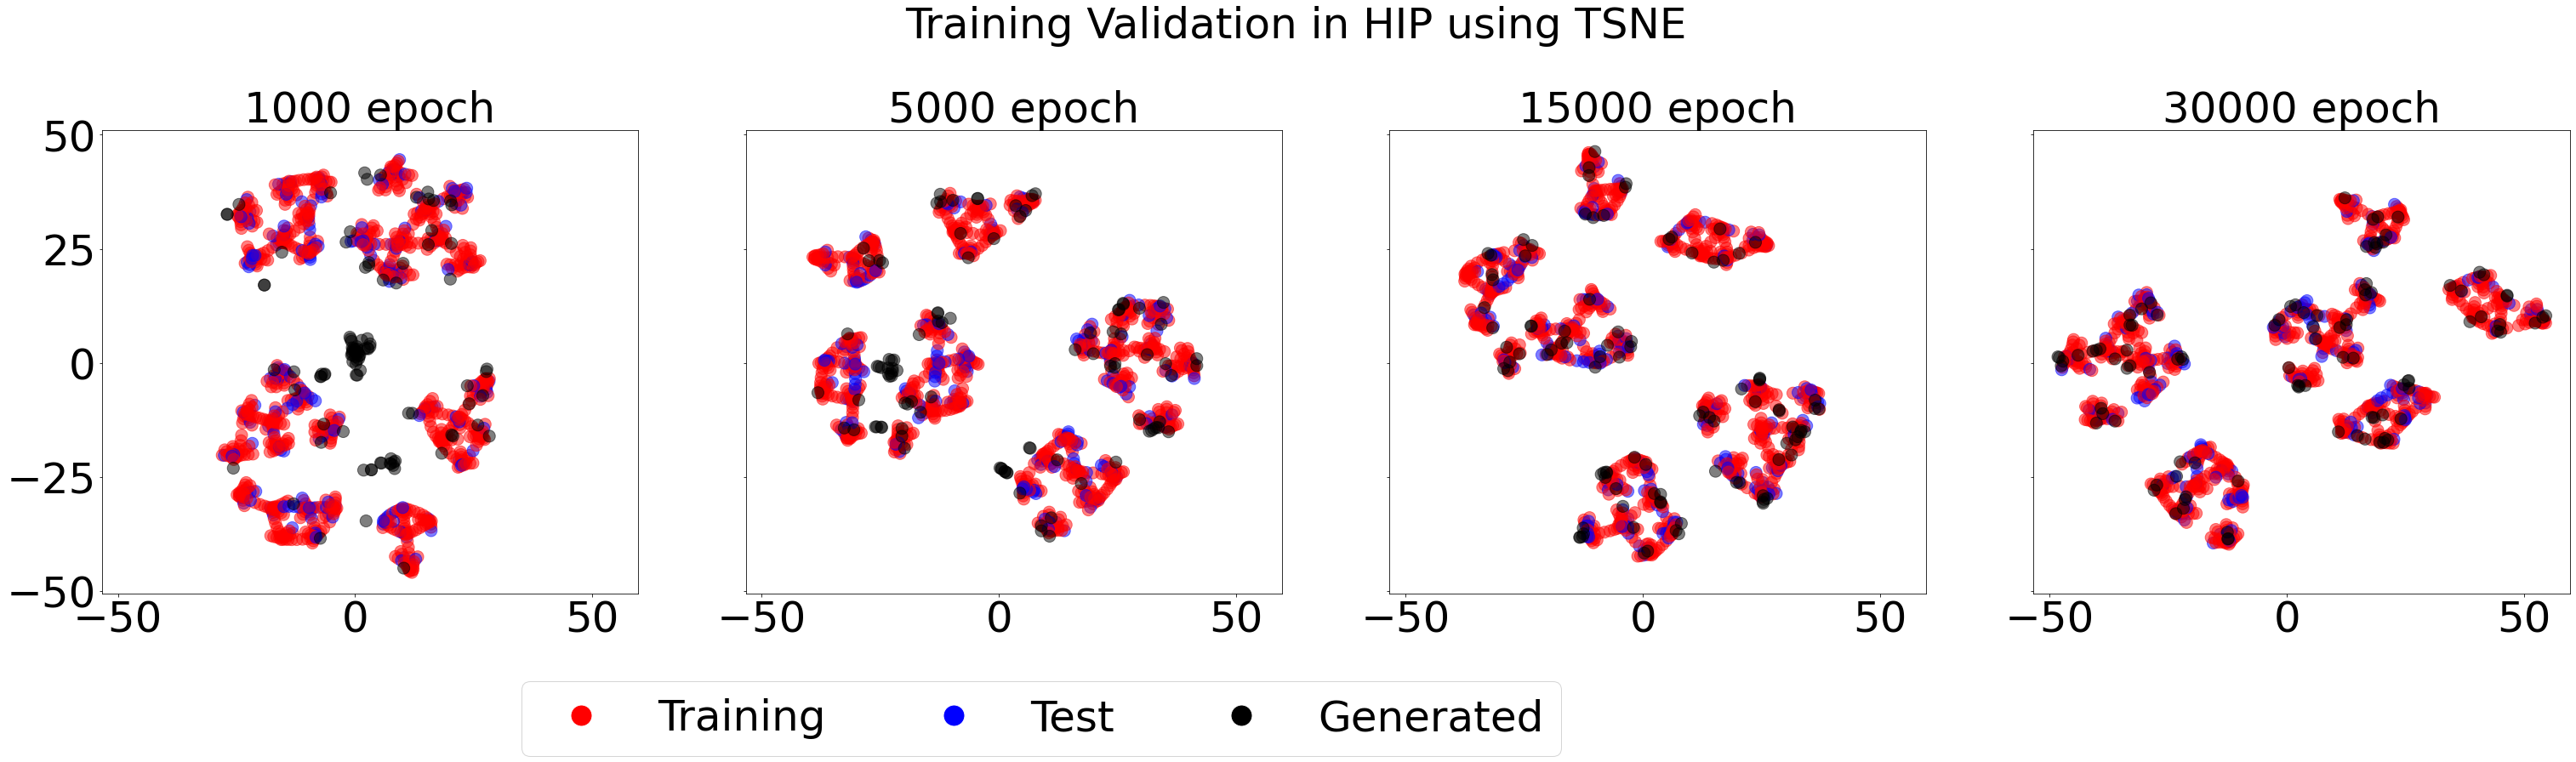

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/3543822975.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


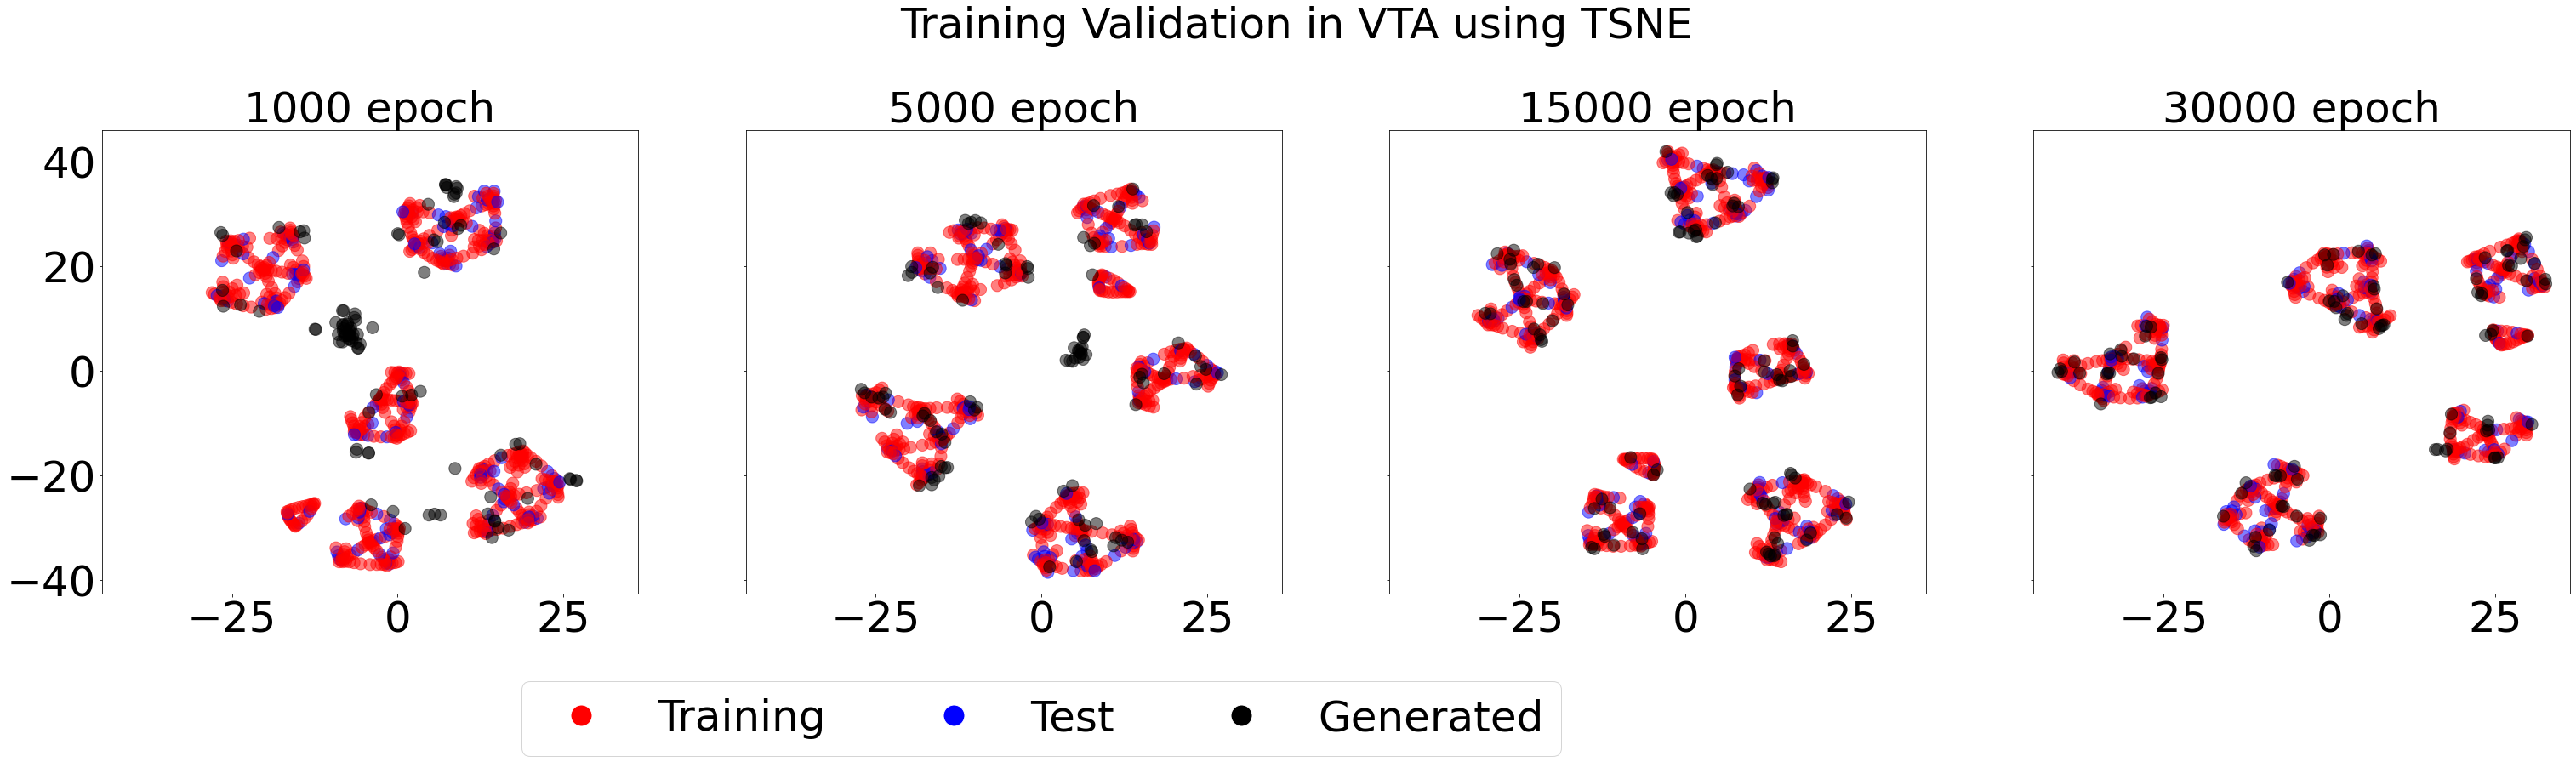

In [10]:
regions = ["PFC", "NAC", "CPU", "BLA", "HIP", "VTA"]

for region in regions:

    training_data_df = pd.read_csv("../../data/%s/%s_10k.csv" % (region, region), index_col = 0)

    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, constrained_layout=True)
    fig.set_size_inches((52, 12))
    plt.rc('xtick',labelsize=50)
    plt.rc('ytick',labelsize=50)

    for i_ax, epoch in enumerate(tqdm([1000, 5000, 15000, 30000])):
        predict_df = load_predict_df(epoch = epoch)
        merged_df, df_transposed_with_header = load_merged_df(training_data_df, predict_df)
        df_tsne = tsne_for_merged(merged_df)

        col_arr = []
        index_arr = df_transposed_with_header.index

        for col in index_arr:
            if col.split("][")[0] == "[test_%s" % region:
                col_arr.append((0, 0, 1, 0.5))
            else:
                col_arr.append((1, 0, 0, 0.5))

        predicted_col_arr = []

        for i in range(100):
            predicted_col_arr.append((0, 0, 0, 0.5))        

        merged_col_arr = col_arr + predicted_col_arr
        for i in range(100):
            predicted_col_arr.append((0, 0, 0, 0.5))

        size_arr = []
        for col in merged_col_arr:
            size_arr.append(200)

        axes[ i_ax].scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], color=merged_col_arr, s=size_arr)
        axes[ i_ax].set_title("%d epoch" % epoch, fontsize = 50)
    #     axes[ i_ax].set_xticks(fontsize = 18)
    #     axes[ i_ax].set_yticks(fontsize = 18)



    fig.suptitle("Training Validation in %s using TSNE" % region, fontsize = 50, y = 1.05)
    # plt.xlabel("tSNE dimension 1", fontsize = 20)
    # plt.ylabel("tSNE dimension 2", fontsize = 20)


    legend_elems = []

    tmp_hash = {"Training": "Red", "Test": "Blue", "Generated": "black"}

    for key in tmp_hash:
        legend_elems.append(Line2D([0], [0], marker='o', color='w', label=key,
                              markerfacecolor=tmp_hash[key], markersize=25))

    # handles, labels = ax.get_legend_handles_labels()
    fig.legend(legend_elems, tmp_hash.keys(), loc='lower center', ncol = 3, fontsize= 50, bbox_to_anchor=(0.42, 0))
    fig.subplots_adjust(bottom=0.25)

    # fig.tight_layout()
    # ax.legend(handles=legend_elems)

    plt.show()

# GAN training validation

  0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_7088/2529264232.py:64: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25)


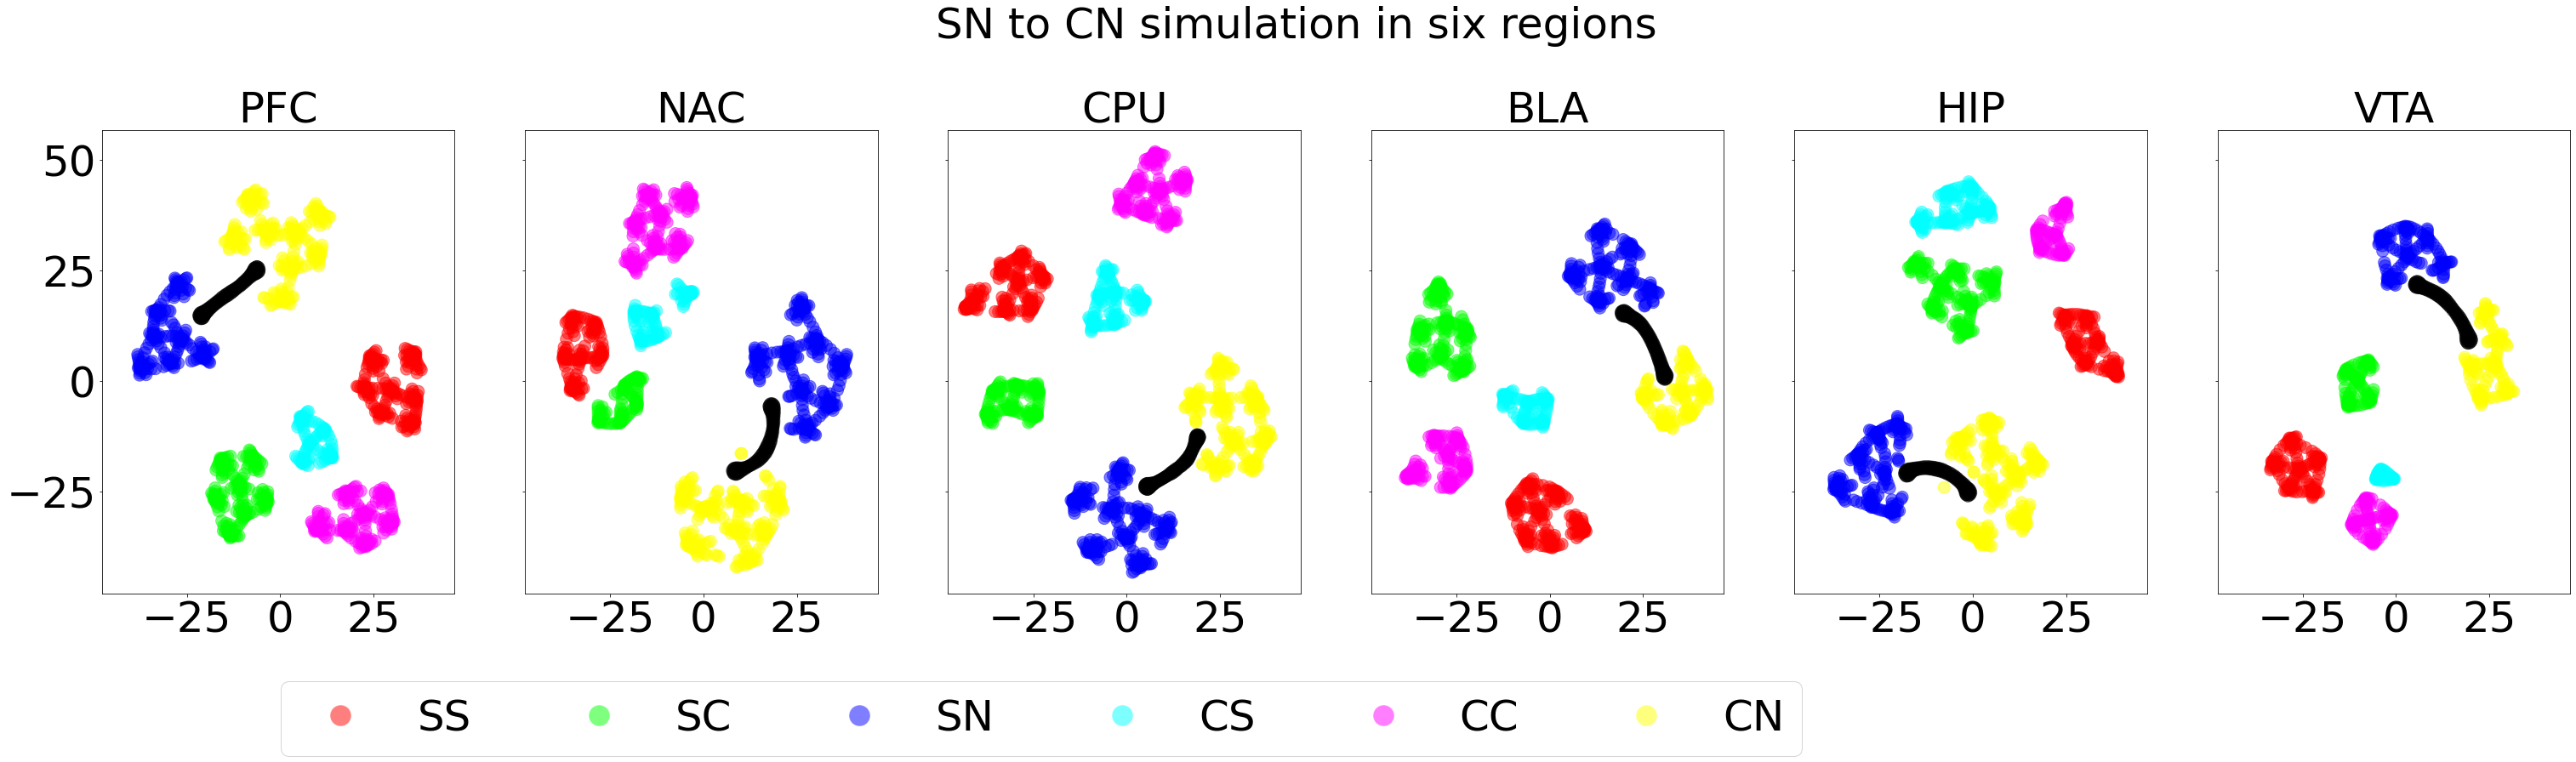

In [13]:
color_hash = {
    'SS': (1, 0, 0, 0.5),
    'SC': (0, 1, 0, 0.5),
    'SN': (0, 0, 1, 0.5),
    'CS': (0, 1, 1, 0.5),
    'CC': (1, 0, 1, 0.5),
    'CN': (1, 1, 0, 0.5)
}


fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True, constrained_layout=True)
fig.set_size_inches((52, 12))
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)

for i_ax, region in enumerate(tqdm(regions)):
    training_data_df = pd.read_csv("../../data/%s/%s_10k.csv" % (region, region), index_col = 0)
    averaged_profile = pd.read_csv("../../data/0921/0825_%s_sample_averaged_profile.csv" % region, index_col = 0)

    merged_df, df_transposed_with_header = load_merged_df_without_t(training_data_df, averaged_profile)
    df_tsne = tsne_for_merged(merged_df)

    col_arr = []
    index_arr = df_transposed_with_header.index

    for col in index_arr:
        col_arr.append(color_hash[col.split("][")[1]])

    predicted_col_arr = []

    for i in range(100):
        predicted_col_arr.append((0, 0, 0, 0.5))        

    merged_col_arr = col_arr + predicted_col_arr
    for i in range(100):
        predicted_col_arr.append((0, 0, 0, 0.5))

    size_arr = []
    for col in merged_col_arr:
        size_arr.append(200)

    axes[ i_ax].scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], color=merged_col_arr, s=size_arr)
    axes[ i_ax].set_title(region, fontsize = 50)
#     axes[ i_ax].set_xticks(fontsize = 18)
#     axes[ i_ax].set_yticks(fontsize = 18)



fig.suptitle("SN to CN simulation in six regions", fontsize = 50, y = 1.05)
# plt.xlabel("tSNE dimension 1", fontsize = 20)
# plt.ylabel("tSNE dimension 2", fontsize = 20)


legend_elems = []

tmp_hash = {"Training": "Red", "Test": "Blue", "Generated": "black"}

for key in color_hash:
    legend_elems.append(Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=color_hash[key], markersize=25))

# handles, labels = ax.get_legend_handles_labels()
fig.legend(legend_elems, color_hash.keys(), loc='lower center', ncol = 6, fontsize= 50, bbox_to_anchor=(0.42, 0))
fig.subplots_adjust(bottom=0.25)

# fig.tight_layout()
# ax.legend(handles=legend_elems)

plt.show()

# Browse gene expression profile (Fig. S3. )

In [27]:
regional_color_hash = {"BLA": (230 / 255, 159 / 255, 0), "VTA": (86 / 255, 180 / 255, 233 / 255), "CPU": (0, 158 / 255, 115 / 255), "HIP": (240 / 255, 228 / 255, 66 / 255), "PFC": (0, 114 / 255, 178 / 255), "NAC": (213 / 255, 94 / 255, 0)}

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = value
    if N == 0:
        return "0 week"
    elif N == 50:
        return "1 week"
    elif N == 98:
        return "2 week"
    else:
        return ""

def plot_gene_profile_raw(interested_gene, col=3):
    row = len(interested_gene) // col
    
    fig, axes = plt.subplots(row, col, sharex=True)#, sharey=True)
    fig.set_size_inches((26, 9.5*row/1.5))
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    
    # plt.rcParams["figure.figsize"] = (col * 9, row * 6)

#     fig, axs = plt.subplots(row, col)
    for g_i, sym in enumerate(interested_gene):
        index = symbol_to_ensemble_hash[sym]

        for i, region in enumerate(regional_color_hash.keys()):
            if index in ensembl_to_symbol_info_hash.keys():
                title = ensembl_to_symbol_info_hash[index].split(":")[0] # title = ensembl_to_symbol_info_hash[index]
            else:
                title = index
                
            df = pd.read_csv(DATA_PATH + "../../data/0921/0825_%s_sample_averaged_profile.csv" % region, index_col = 0)


            if index in df.index:
                axes[ g_i // col, g_i % col].set_title("%s" % title, fontsize=30)
                axes[ g_i // col, g_i % col].set_ylim(0, 1.)
                axes[ g_i // col, g_i % col].set_xticks([], [])

                # axs[ g_i // col, g_i % col].set_xticks([0, 50, 100], ('Start', '1 week', '2 week'))
                # plt.xlabel("Cocaine Self Administration", fontsize = 20)
                # plt.ylabel("Normalized Gene Expression", fontsize = 20)
                
                axes[ g_i // col, g_i % col].plot(df.loc[index,:].values, label = region, linewidth=3.5, color=regional_color_hash[region])
                axes[ g_i // col, g_i % col].set_xticks(list(range(0,99)))#, ['January', 'February', 'March'])
                axes[ g_i // col, g_i % col].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    for ax in fig.get_axes():
        ax.label_outer() 
    
#     fig.supylabel("Log2FC", fontsize = 25)
#     fig.supxlabel("Simulation Time Step", fontsize = 25)    
    
    fig.suptitle("Averaged raw profile of Creb3 family genes", fontsize = 50)
    
    fig.tight_layout(rect=[0.03, 0.03, 1, 0.9])
    
    legend_elems = []

    for key in regional_color_hash:
        legend_elems.append(Line2D([0], [0], label=key, color=regional_color_hash[key], linewidth = 5 ,
                              markerfacecolor=regional_color_hash[key], markersize=25))

    # handles, labels = ax.get_legend_handles_labels()
    fig.legend(legend_elems, regional_color_hash.keys(), loc='lower center', ncol = 6, fontsize= 25, bbox_to_anchor=(0.5, 0))
    fig.subplots_adjust(bottom=0.15)
    

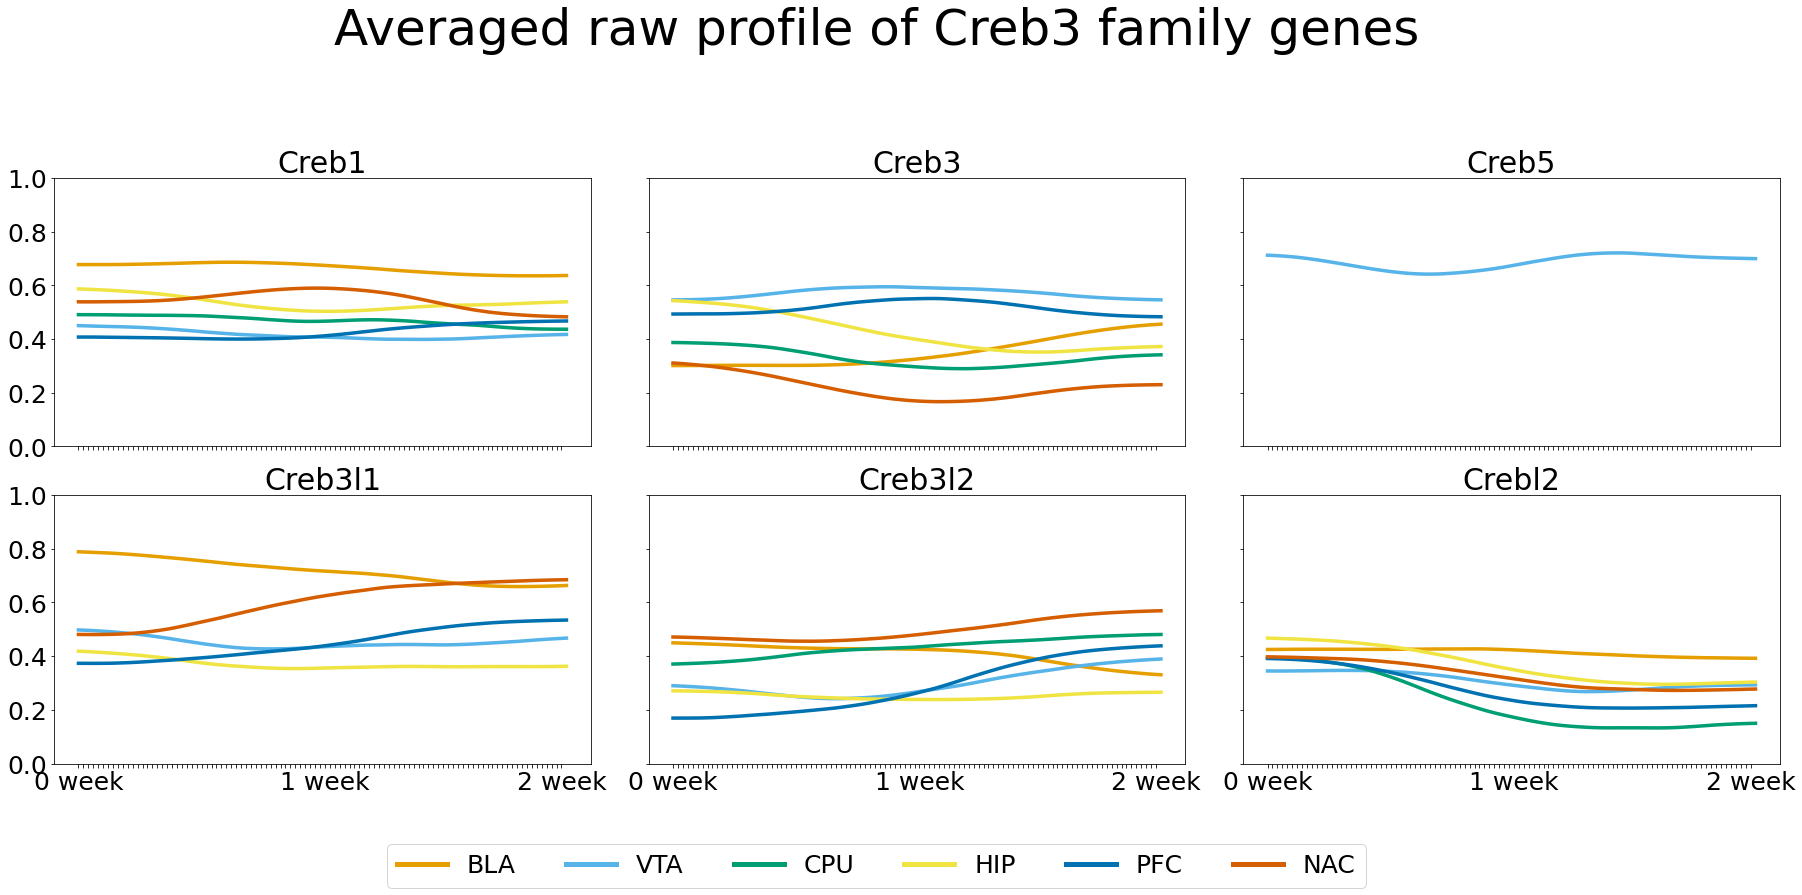

In [26]:
interested_gene = ["Creb1", "Creb3", "Creb5", "Creb3l1", "Creb3l2", "Crebl2"]
plot_gene_profile_raw(interested_gene)